Populating the interactive namespace from numpy and matplotlib


/usr/common/software/python/3.6-anaconda-4.4/lib/python3.6/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['flag']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


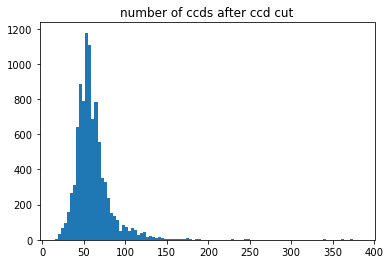

In [16]:
%pylab inline
WorkDir = '/global/cscratch1/sd/huikong/obiwan_Aug/repos_for_docker/obiwan_code/py/obiwan/more/obiwan_run/brickstat/elg_new_ccd_list/'
fn_ccd_num = 'BrickccdNum.txt'
#fn_run_time = 
import matplotlib.pyplot as plt
import numpy as np
ccd_num = np.loadtxt(WorkDir+fn_ccd_num,dtype=np.str).transpose()
#run_time = np.loadtxt(WorkDir+fn_run_time,dtype=np.str).transpose()

#a plot of num distribution of ccds
num_hist = np.array([int(num) for num in ccd_num[1]])
plt.hist(num_hist,bins=100)
plt.title('number of ccds after ccd cut')
#and a plot of 3d distribution of ccds
def brickname2radec(brickname):
    ra_f = int(brickname[0:3])
    ra_b = int(brickname[3])
    ra = ra_f+0.1*ra_b
    dec_f = int(brickname[5:7])
    dec_b = int(brickname[7])
    dec = dec_f + dec_b*0.1
    if brickname[4] == 'm':
        dec = dec*(-1)
    return ra,dec

In [17]:
radecs = list(map(brickname2radec,ccd_num[0]))

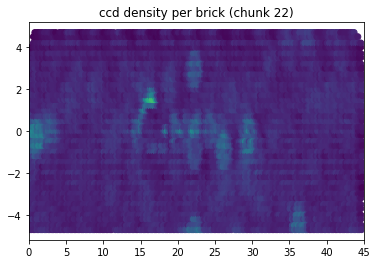

In [18]:
ra_dec = np.array(radecs).transpose()
ra = ra_dec[0]
dec = ra_dec[1]
plt.scatter(ra,dec,c=num_hist)
plt.gca().set_xlim((0,45))
plt.title('ccd density per brick (chunk 22)')

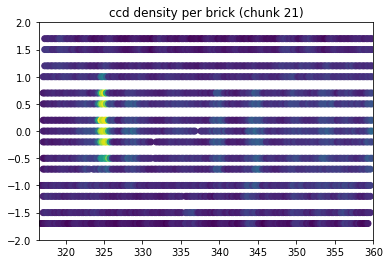

In [19]:
plt.scatter(ra,dec,c=num_hist)
plt.gca().set_xlim((316.5,360))
plt.gca().set_ylim((-2,2))
plt.title('ccd density per brick (chunk 21)')

In [20]:
#timing
fn_bricktiming = 'BrickTiming.txt'
bricktiming = np.loadtxt(WorkDir+fn_bricktiming,dtype=np.str).transpose()

In [21]:
def brick_match():
    #match ccd number to timing
    match_list = []
    for i in range(len(bricktiming[0])):
        for j in range(len(ccd_num[0])):
            if bricktiming[0][i] == ccd_num[0][j]:
                index = j
        match_list.append([bricktiming[0][i],bricktiming[1][i],ccd_num[1][index]])
    return match_list

In [22]:
match_list = brick_match()

(0, 2)

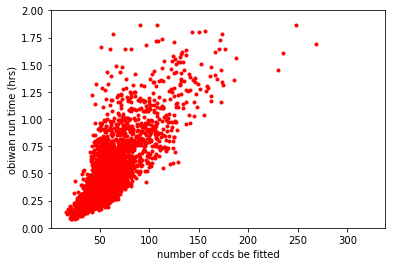

In [26]:
match_list = np.array(match_list,dtype = np.str)
CCD_NUM = [int(i) for i in match_list[:,2]]
RUN_TIME = [float(i) for i in match_list[:,1]]
data_set = np.array(list(zip(CCD_NUM,RUN_TIME))).transpose()
plt.plot(data_set[0],data_set[1],'r.')
plt.xlabel('number of ccds be fitted')
plt.ylabel('obiwan run time (hrs)')
plt.gca().set_ylim((0,2))

In [55]:
#the outliner
BRICKNAME = [i for i in match_list[:,0]]
CCD_NUM = [int(i) for i in match_list[:,2]]
RUN_TIME = [float(i) for i in match_list[:,1]]
data_set3 = list(zip(BRICKNAME,CCD_NUM,RUN_TIME))

for i in range(len(data_set3)):
    if data_set3[i][2]>4:
        print(data_set3[i])

('0136m015', 73, 4.566239)
('0163p020', 122, 17.360328)


In [9]:
t = bricktiming[1].astype(float)
b = bricktiming[0]

In [10]:
flag = np.zeros(len(t),dtype = bool)
for i in range(len(t)):
    if t[i]<0.5:
        flag[i]=True
b_new = b[flag]

In [35]:
import numpy as np
top_dir = '/global/u2/h/huikong/obiwan_codes/obiwan_Aug/obiwan_code/py/obiwan/more/obiwan_run/brickstat/elg_new_ccd_list/'
np.savetxt(top_dir+'EasyBricks.txt',b_new,fmt="%s")

In [34]:
b_new

array(['0001m015', '0001m020', '0001m022', ..., '0254p042', '0254p045',
       '0254p047'],
      dtype='<U9')

In [36]:
top_dir+'EasyBricks.txt'

'/global/u2/h/huikong/obiwan_codes/obiwan_Aug/obiwan_code/py/obiwan/more/obiwan_run/brickstat/elg_new_ccd_list/EasyBricks.txt'